In [52]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#Q1 ALE/Assault-ram-v5
models = ["expected_sarsa_rewards", "q_learning_rewards"]
epsilons = [0.25, 0.1, 0.01]
env = "ASSAULT"
Q = "PickleFiles"
# lrs = [1/4, 1/8, 1/16]
lrs = [0.01, 0.001, 0.0001]
replay_buffers = [(128, 1000000), (1, 1)]
hypers = [(lr, rb[0], rb[1], eps) for eps in epsilons for lr in lrs for rb in replay_buffers]
print(hypers)

[(0.01, 128, 1000000, 0.25), (0.01, 1, 1, 0.25), (0.001, 128, 1000000, 0.25), (0.001, 1, 1, 0.25), (0.0001, 128, 1000000, 0.25), (0.0001, 1, 1, 0.25), (0.01, 128, 1000000, 0.1), (0.01, 1, 1, 0.1), (0.001, 128, 1000000, 0.1), (0.001, 1, 1, 0.1), (0.0001, 128, 1000000, 0.1), (0.0001, 1, 1, 0.1), (0.01, 128, 1000000, 0.01), (0.01, 1, 1, 0.01), (0.001, 128, 1000000, 0.01), (0.001, 1, 1, 0.01), (0.0001, 128, 1000000, 0.01), (0.0001, 1, 1, 0.01)]


In [ ]:
rewards = {}

for hyper in hypers:
    lr, batch_size, buffer_size, epsilon = hyper
    for model in models:
        path = f"plots/{Q}/{env}/{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}.pkl"
        path2 = f"plots/{Q}/{env}/2{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}.pkl"
        if os.path.exists(path):
            with open(path, "rb") as f:
                if f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}" not in rewards:
                    rewards[f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}"] = [pickle.load(f)[0].tolist()]
                else: 
                    rewards[f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}"].append(pickle.load(f)[0])
        if os.path.exists(path2):
            with open(path2, "rb") as f:
                if f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}" not in rewards:
                    rewards[f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}"] = [pickle.load(f)[0].tolist()]
                else: 
                    rewards[f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}"].append(pickle.load(f)[0])


{'expected_sarsa_rewards_0.01_128_1000000_0.25': [[189.0, 231.0, 189.0, 231.0, 252.0, 168.0, 336.0, 315.0, 168.0, 294.0, 210.0, 294.0, 189.0, 42.0, 252.0, 273.0, 336.0, 357.0, 252.0, 336.0, 105.0, 273.0, 189.0, 189.0, 294.0, 189.0, 378.0, 357.0, 147.0, 252.0, 252.0, 399.0, 231.0, 189.0, 357.0, 294.0, 315.0, 273.0, 315.0, 252.0, 189.0, 189.0, 357.0, 189.0, 189.0, 189.0, 294.0, 357.0, 315.0, 357.0, 315.0, 210.0, 126.0, 273.0, 210.0, 294.0, 42.0, 231.0, 399.0, 189.0, 378.0, 336.0, 357.0, 378.0, 378.0, 441.0, 210.0, 210.0, 252.0, 231.0, 378.0, 294.0, 273.0, 252.0, 210.0, 231.0, 189.0, 399.0, 399.0, 168.0, 189.0, 252.0, 399.0, 273.0, 336.0, 252.0, 420.0, 294.0, 336.0, 420.0, 483.0, 378.0, 399.0, 420.0, 126.0, 378.0, 315.0, 399.0, 315.0, 441.0, 273.0, 189.0, 420.0, 399.0, 399.0, 294.0, 231.0, 252.0, 168.0, 231.0, 294.0, 210.0, 378.0, 189.0, 420.0, 315.0, 441.0, 420.0, 504.0, 273.0, 378.0, 315.0, 420.0, 273.0, 273.0, 357.0, 210.0, 315.0, 189.0, 189.0, 357.0, 273.0, 336.0, 378.0, 336.0, 399.0,

(2, 1000)
(2, 1000)


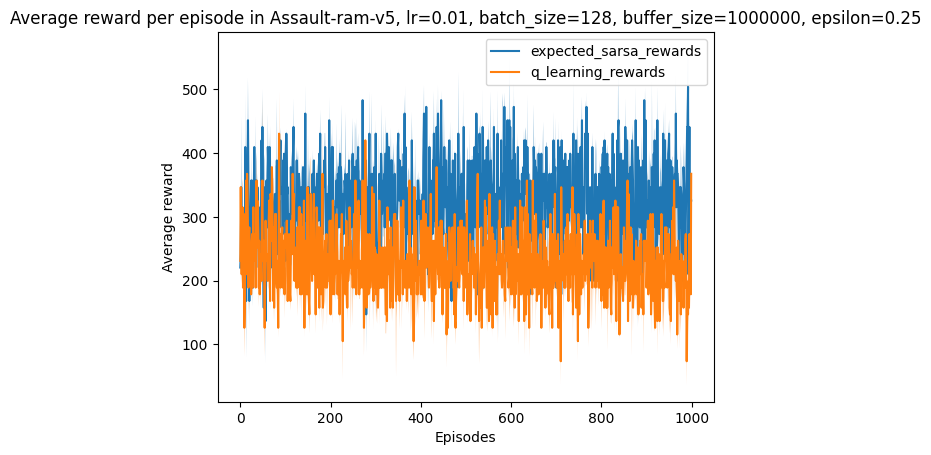

(2, 1000)
(2, 1000)


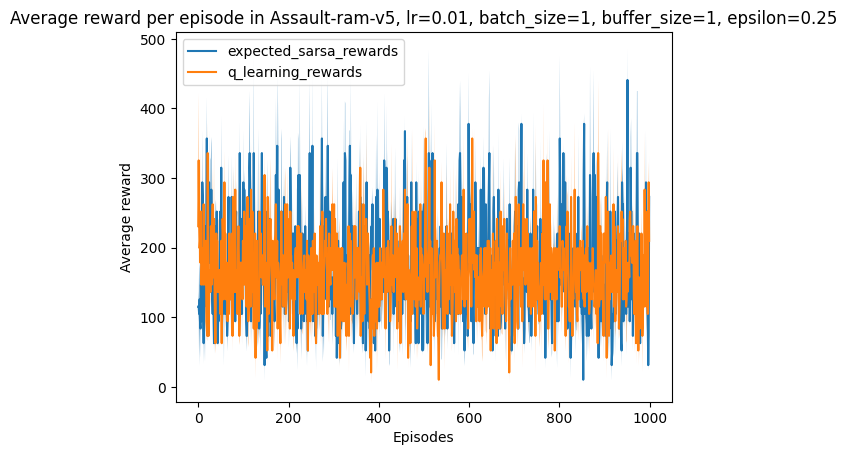

(2, 1000)
(2, 1000)


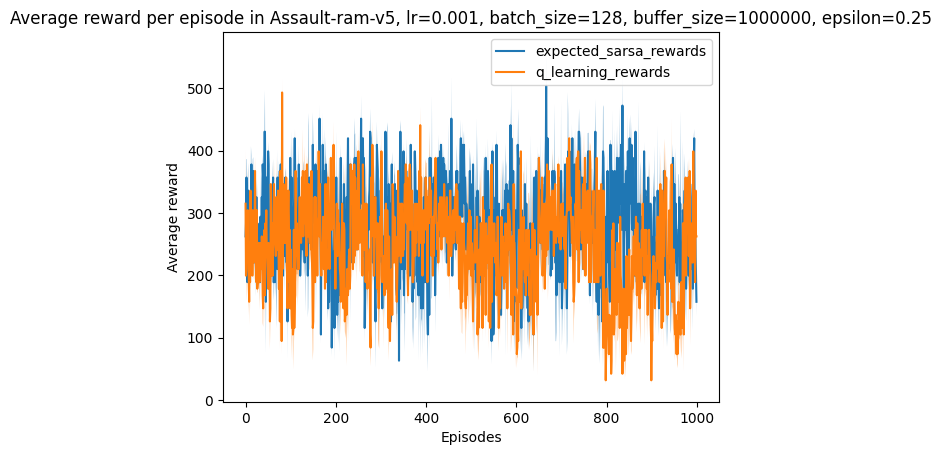

(2, 1000)
(2, 1000)


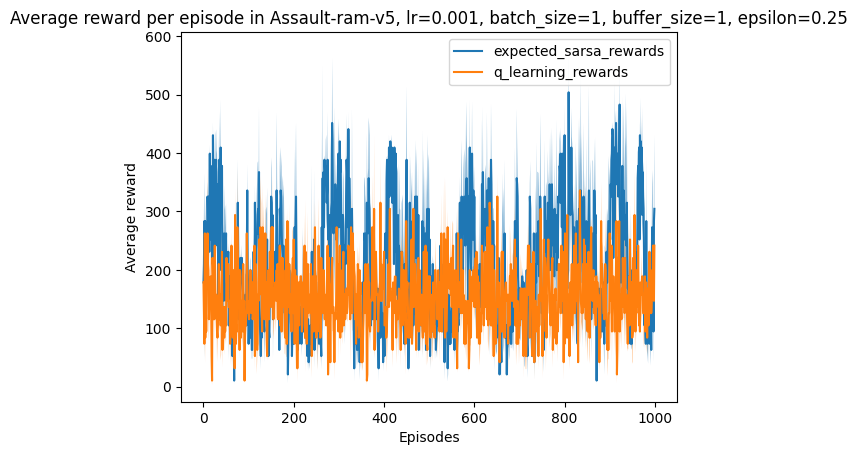

(2, 1000)
(2, 1000)


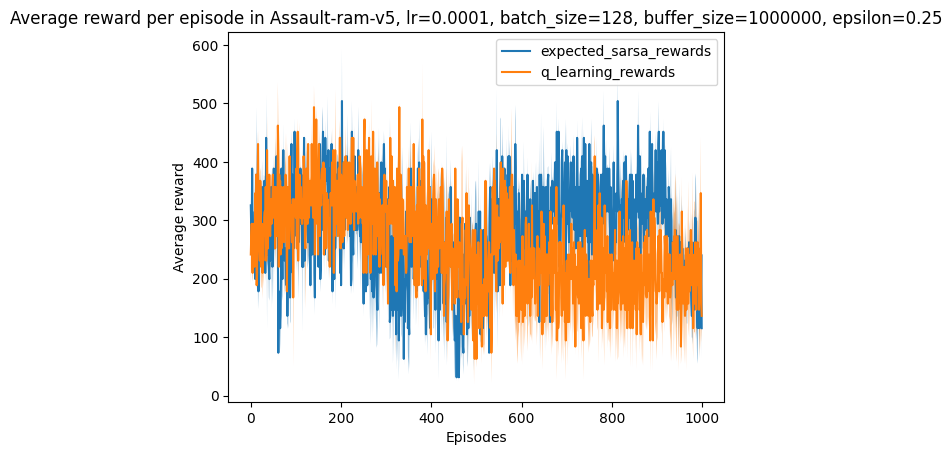

(2, 1000)
(2, 1000)


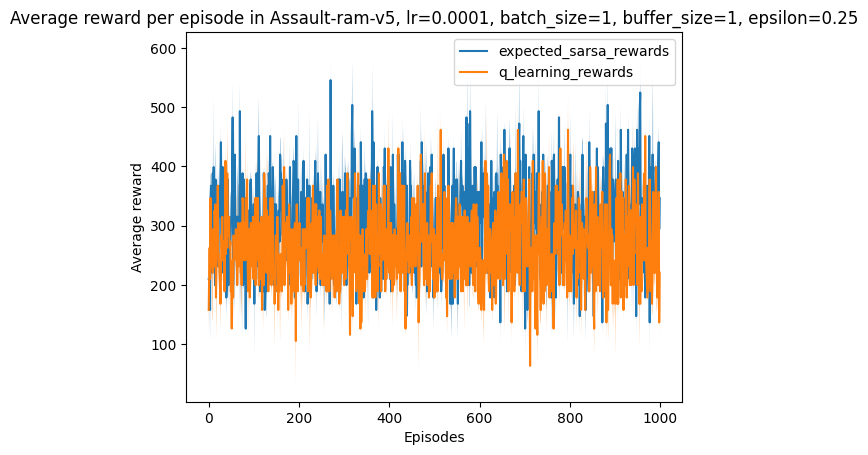

(2, 1000)
(2, 1000)


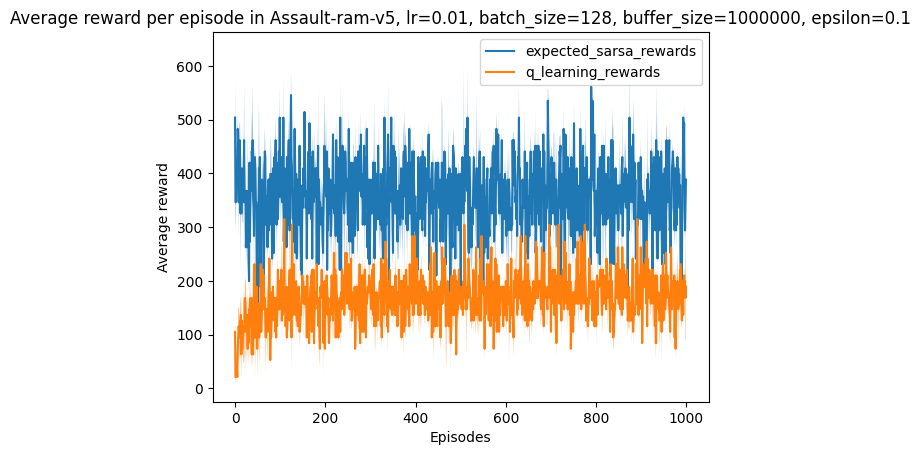

(2, 1000)
(2, 1000)


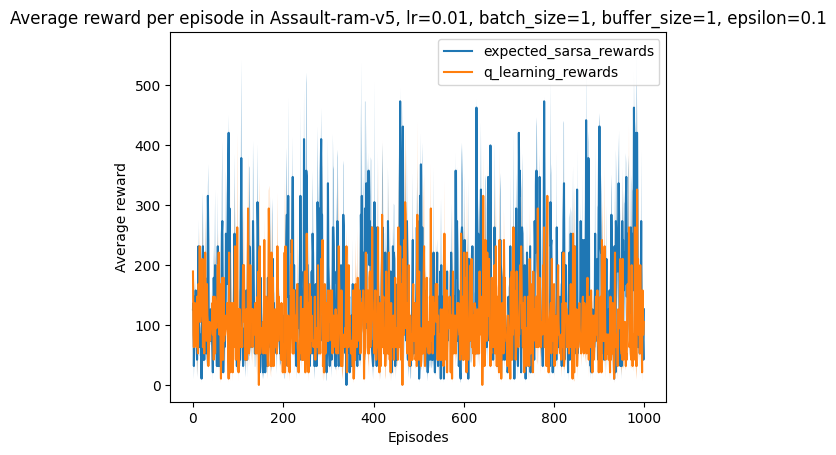

(2, 1000)
(2, 1000)


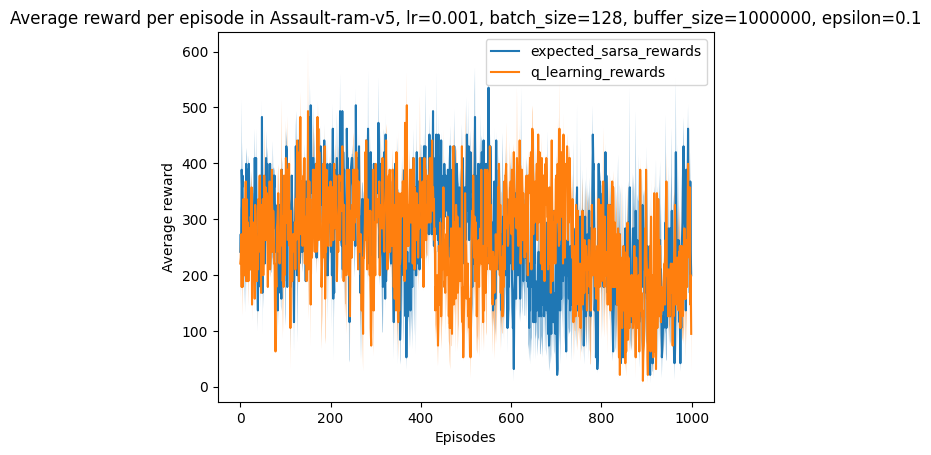

(2, 1000)
(2, 1000)


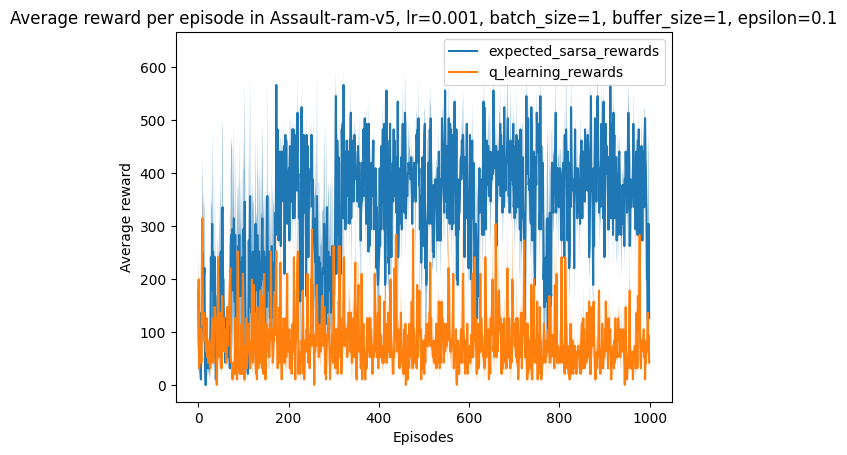

(2, 1000)
(2, 1000)


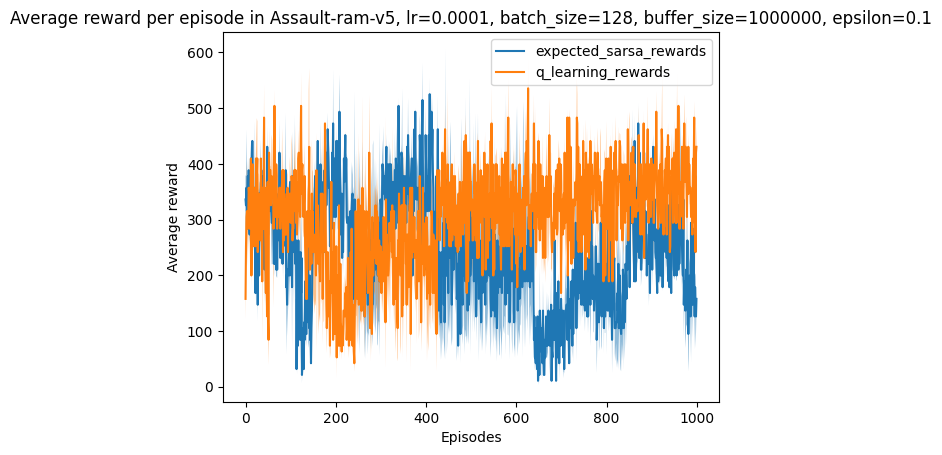

(2, 1000)
(2, 1000)


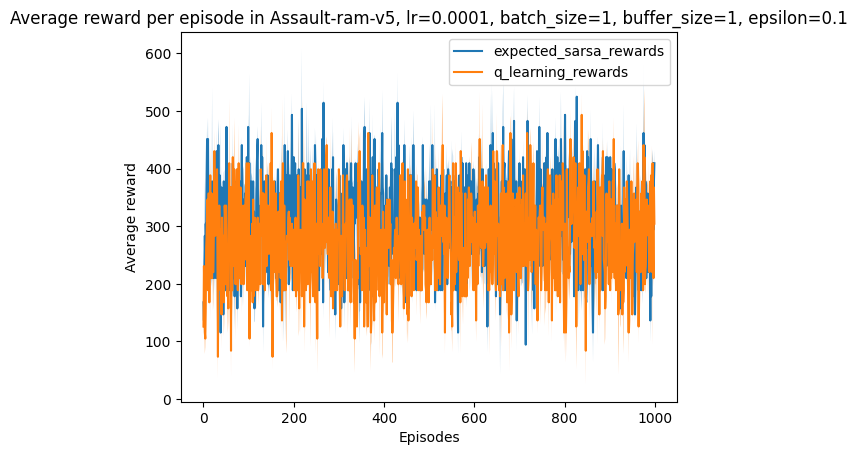

(2, 1000)
(2, 1000)


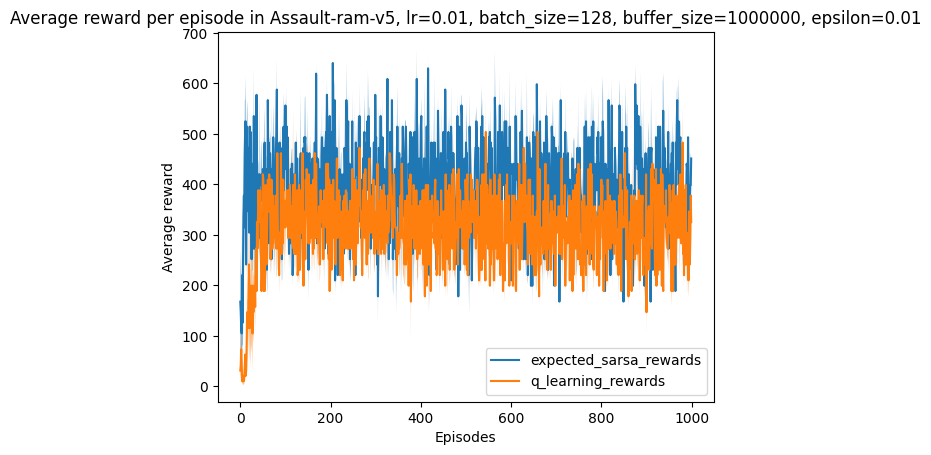

(2, 1000)
(2, 1000)


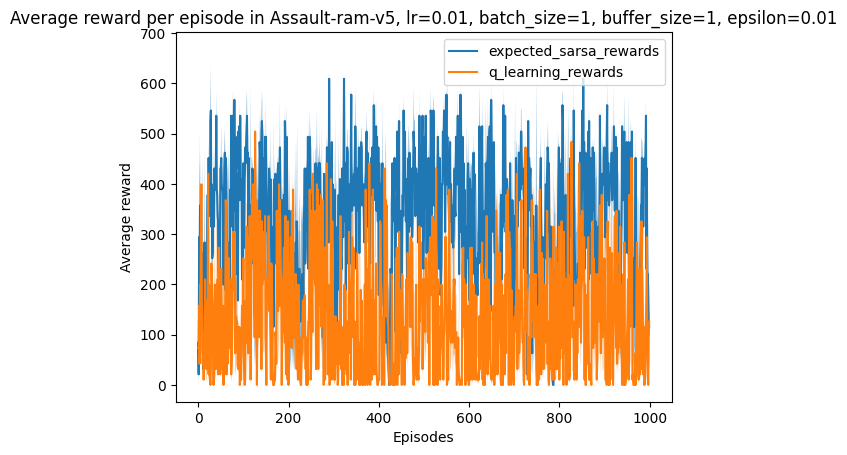

(2, 1000)
(2, 1000)


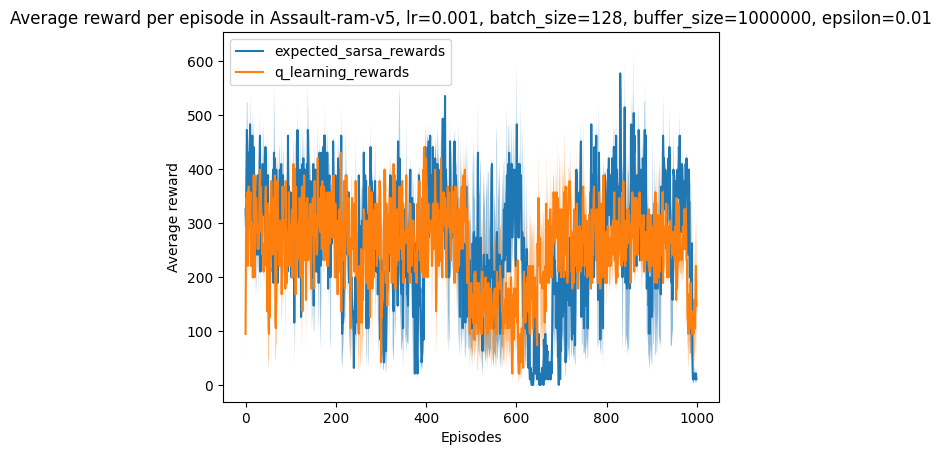

(2, 1000)
(2, 1000)


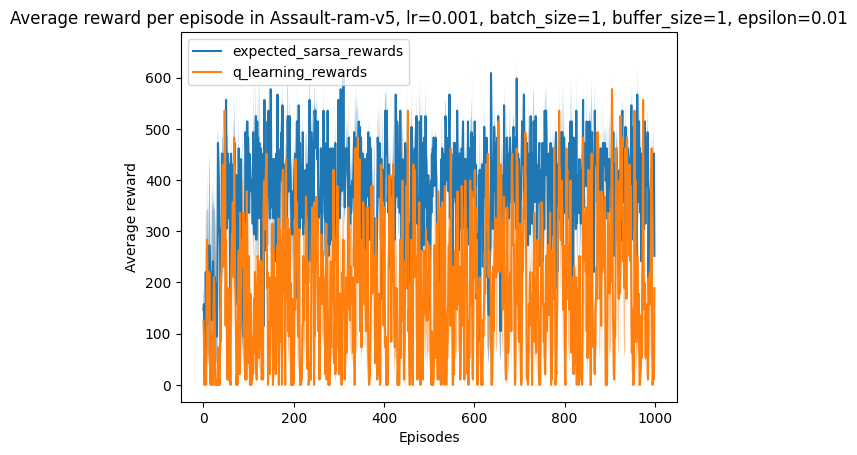

(2, 1000)
(2, 1000)


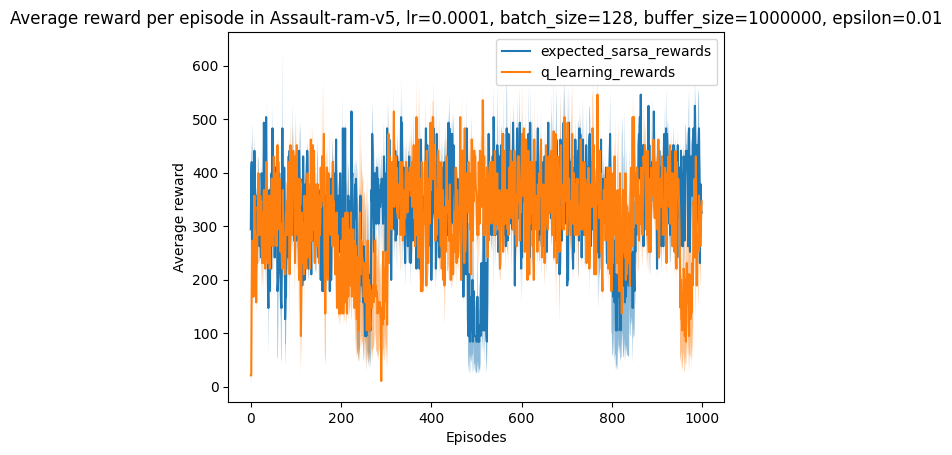

(2, 1000)
(2, 1000)


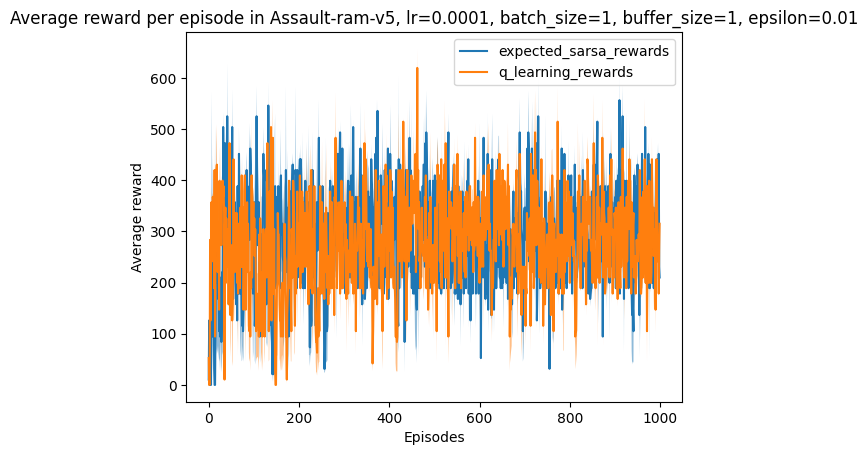

In [ ]:
ENV = "Assault-ram-v5"
for hyper in hypers:
    lr, batch_size, buffer_size, epsilon = hyper
    for model in models:
        rewards_comb = rewards[f"{model}_{lr}_{batch_size}_{buffer_size}_{epsilon}"]
        rewards_comb = np.array(rewards_comb)
        mean_rewards = np.mean(rewards_comb, axis=0)
        std_rewards = np.std(rewards_comb, axis=0)/np.sqrt(rewards_comb.shape[0])
        plt.plot(mean_rewards, label=f"{model}")
        plt.fill_between(range(mean_rewards.shape[0]), mean_rewards-std_rewards, mean_rewards+std_rewards, alpha=0.5)
    plt.title(f"Average reward per episode in {ENV}, lr={lr}, batch_size={batch_size}, buffer_size={buffer_size}, epsilon={epsilon}")
    plt.xlabel("Episodes")
    plt.ylabel("Average reward")
    plt.legend()
    plt.show()

In [50]:
currdir = os.getcwd()
files = os.listdir(currdir)
for file in files:
    if not file.startswith("2"):
        if file.endswith(".pkl"):
            print(file)
            os.rename(file, f"2{file}")


expected_sarsa_rewards_0.0001_1_1_0.25.pkl
expected_sarsa_rewards_0.01_128_1000000_0.1.pkl
q_learning_rewards_0.01_128_1000000_0.25.pkl
expected_sarsa_rewards_0.01_1_1_0.25.pkl
expected_sarsa_rewards_0.01_128_1000000_0.01.pkl
expected_sarsa_rewards_0.001_1_1_0.01.pkl
q_learning_rewards_0.0001_128_1000000_0.1.pkl
q_learning_rewards_0.0001_128_1000000_0.25.pkl
expected_sarsa_rewards_0.001_128_1000000_0.25.pkl
q_learning_rewards_0.001_128_1000000_0.01.pkl
expected_sarsa_rewards_0.0001_128_1000000_0.25.pkl
expected_sarsa_rewards_0.0001_1_1_0.1.pkl
expected_sarsa_rewards_0.01_1_1_0.1.pkl
expected_sarsa_rewards_0.001_128_1000000_0.1.pkl
q_learning_rewards_0.001_128_1000000_0.25.pkl
expected_sarsa_rewards_0.0001_128_1000000_0.01.pkl
q_learning_rewards_0.0001_128_1000000_0.01.pkl
expected_sarsa_rewards_0.001_128_1000000_0.01.pkl
expected_sarsa_rewards_0.001_1_1_0.1.pkl
q_learning_rewards_0.0001_1_1_0.25.pkl
expected_sarsa_rewards_0.01_128_1000000_0.25.pkl
expected_sarsa_rewards_0.001_1_1_0.25.